In [1]:
import requests

menu_item_url = "https://api.arogga.com/general/v1/menuItem"

response = requests.get(menu_item_url)

data = response.json()

categories = []
for item in data['data']:
    categories.append(item['mi_cat_id'])

categories.sort()
print("Size of categories:", len(categories))

Size of categories: 1641


In [22]:
import csv
import requests

for category in categories:
        csv_file_path = f"arogga_{category}.csv"
        with open(csv_file_path, 'a', newline='' , encoding='utf-8') as file:
            writer = csv.writer(file)
            writer.writerow(['Product Name','Type','Brand','Is Anti-Biotic','Description','Meta Description','Keywords','Manufacturer','Product Cold Chain','Tags','Base Unit Label','Average Rating','MRP'])
    
            for page in range(1, 10):
                api_url = f"https://api.arogga.com/general/v3/search/?_page={page}&_perPage=100&_product_category_id={category}"
                # Make the request
                response = requests.get(api_url)
    
                # Write the data
                data = response.json()
                if (len(data['data']) == 0 or data['status'] == 'fail'):
                    break
                
                for product in data['data']:
                    if 'pv' in product and len(product['pv']) > 0:
                        pv_item = product['pv'][0]
                    
                        writer.writerow([
                            product.get('p_name', 'N/A'),
                            product.get('p_type', 'N/A'),
                            product.get('p_brand', 'N/A'),
                            product.get('is_antibiotics', 'N/A'),
                            product.get('p_description', 'N/A'),
                            product.get('p_meta_description', 'N/A'),
                            product.get('p_product_keywords', 'N/A'),
                            product.get('p_manufacturer', 'N/A'),
                            product.get('p_cold', 'N/A'),
                            product.get('p_product_tags_title', 'N/A'),
                            pv_item.get("pu_base_unit_label", 'N/A'),
                            pv_item.get("pv_average_rating", 'N/A'),
                            pv_item.get("pv_mrp", 'N/A')
                    ])
                    else:
                        writer.writerow([
                            product.get('p_name', 'N/A'),
                            product.get('p_type', 'N/A'),
                            product.get('p_brand', 'N/A'),
                            product.get('is_antibiotics', 'N/A'),
                            product.get('p_description', 'N/A'),
                            product.get('p_meta_description', 'N/A'),
                            product.get('p_product_keywords', 'N/A'),
                            product.get('p_manufacturer', 'N/A'),
                            product.get('p_cold', 'N/A'),
                            product.get('p_product_tags_title', 'N/A'),
                            'N/A',
                            'N/A',
                            'N/A'
                        ])
                    



In [6]:
import os

script_dir = os.getcwd()  # Get the current working directory
csv_dir = os.path.join(script_dir, 'data')  # Construct the relative path

if os.path.exists(csv_dir) and os.path.isdir(csv_dir):
    file_count = len([name for name in os.listdir(csv_dir) if os.path.isfile(os.path.join(csv_dir, name))])
    print("Number of files in data directory:", file_count)
else:
    print("The 'data' directory does not exist.")


Number of files in data directory: 2


In [7]:
import pandas as pd
arogga_1 = csv_dir +"/arogga_1.csv"
arogga_2 = csv_dir +"/arogga_2.csv"

arogga_1_df = pd.read_csv(arogga_1)
arogga_2_df = pd.read_csv(arogga_2)

# Read the CSV file
df = pd.concat([arogga_1_df, arogga_2_df])

# Count the number of rows (excluding the header)
row_count = len(df)

print(f"Total number of rows in merged_output.csv: {row_count}")

# Display basic statistics
print("Basic Statistics:")
print(df.describe(include='all'))

# Display the number of unique values in each column
print("\nUnique Values per Column:")
print(df.nunique())

# Display the number of missing values in each column
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Display the data types of each column
print("\nData Types of Each Column:")
print(df.dtypes)

Total number of rows in merged_output.csv: 113608
Basic Statistics:
       Product Name      Type                        Brand  Is Anti-Biotic  \
count        113608    113608                       113400          113608   
unique        43320        14                         2318               5   
top          Maxpro  medicine  Square Pharmaceuticals PLC.               0   
freq             78     62875                         5604           56245   

                                              Description  \
count                                               45216   
unique                                              18463   
top     <ul>\n<li>The harmony of soft chocolate and cr...   
freq                                                   77   

                                         Meta Description  Keywords  \
count                                                6782       582   
unique                                               1034       143   
top     Ursocol 300 mg

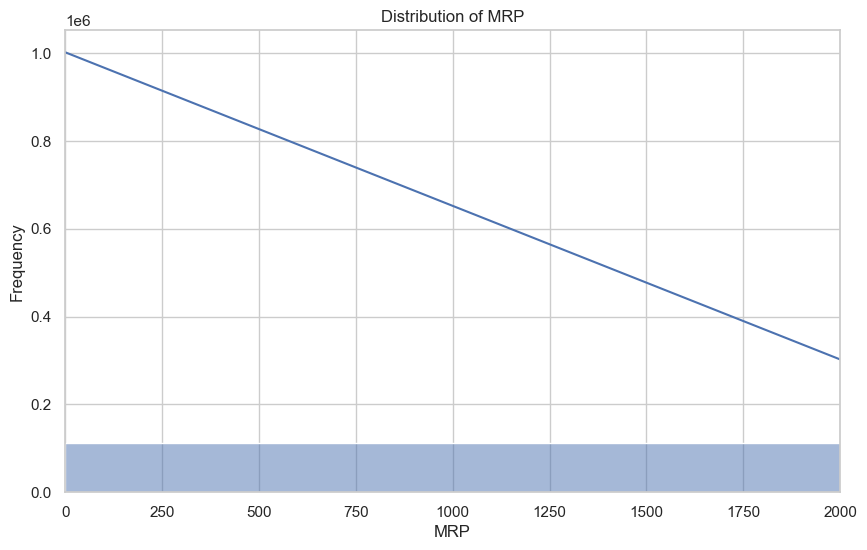

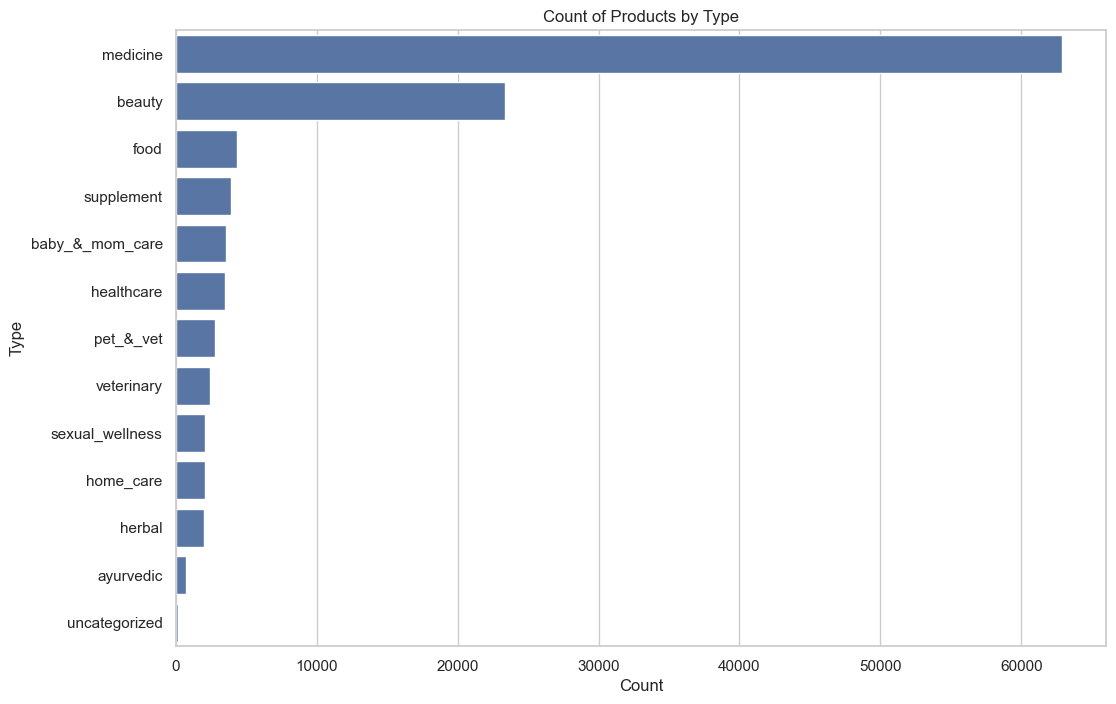

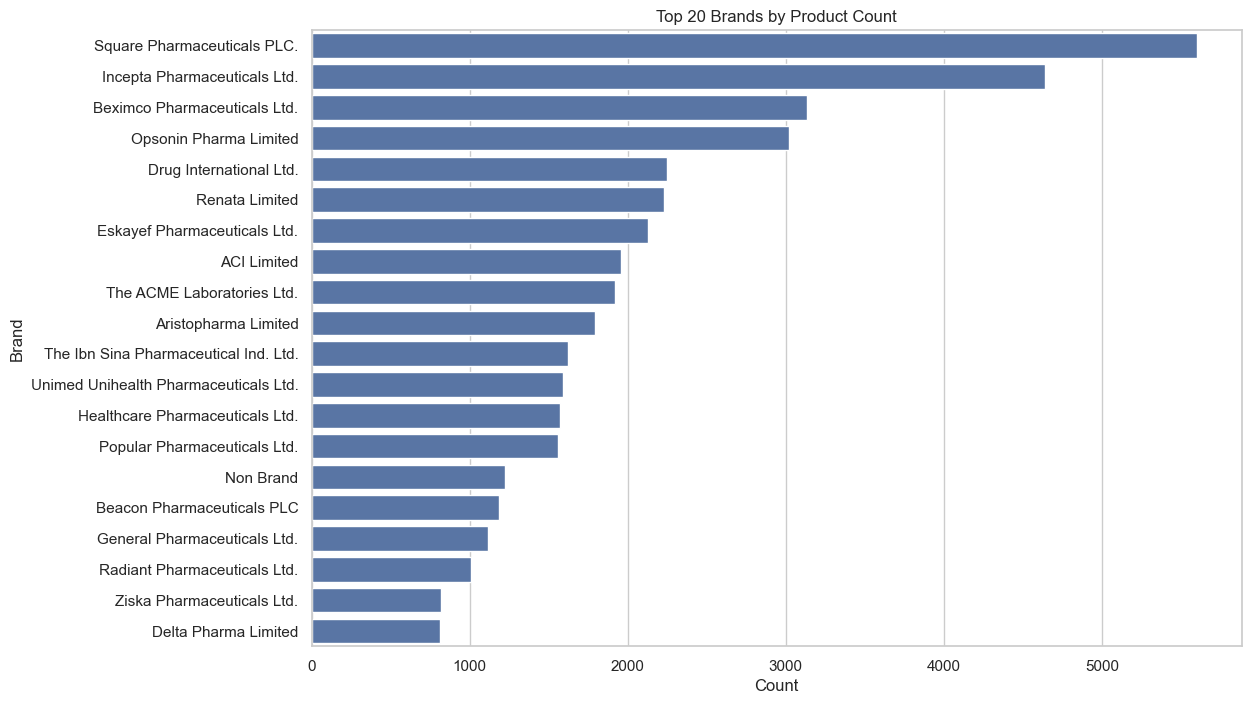

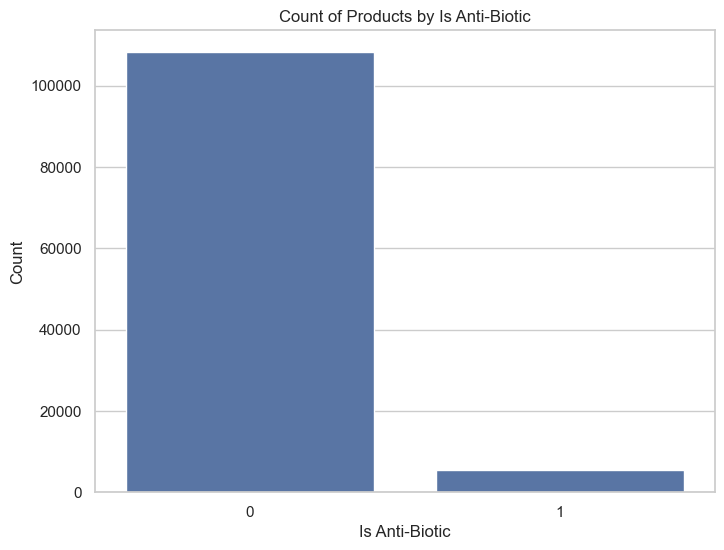

Total unique values in the dataframe: 73751


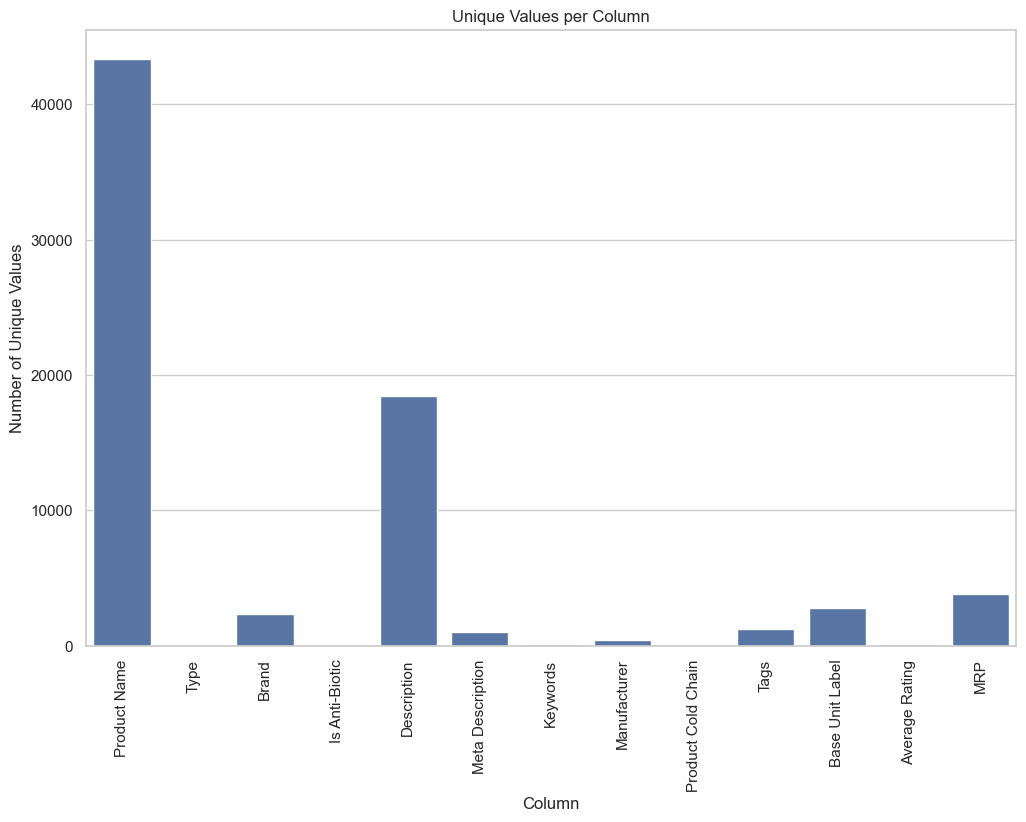

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Convert 'MRP' column to numeric, coercing errors to NaN and then drop NaN values
df['MRP'] = pd.to_numeric(df['MRP'], errors='coerce')
df = df.dropna(subset=['MRP'])

# Plot the distribution of 'MRP'
plt.figure(figsize=(10, 6))
sns.histplot(df['MRP'], bins=50, kde=True)
plt.title('Distribution of MRP')
plt.xlabel('MRP')
plt.ylabel('Frequency')
plt.xlim(0, 2000)
plt.show()

# Plot the count of products by 'Type'
plt.figure(figsize=(12, 8))
sns.countplot(y='Type', data=df, order=df['Type'].value_counts().index)
plt.title('Count of Products by Type')
plt.xlabel('Count')
plt.ylabel('Type')
plt.show()

# Plot the count of products by 'Brand'
plt.figure(figsize=(12, 8))
top_brands = df['Brand'].value_counts().nlargest(20).index
sns.countplot(y='Brand', data=df[df['Brand'].isin(top_brands)], order=top_brands)
plt.title('Top 20 Brands by Product Count')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.show()

# Plot the count of products by 'Is Anti-Biotic'
plt.figure(figsize=(8, 6))
sns.countplot(x='Is Anti-Biotic', data=df)
plt.title('Count of Products by Is Anti-Biotic')
plt.xlabel('Is Anti-Biotic')
plt.ylabel('Count')
plt.show()

# Show total unique values in the dataframe
total_unique_values = df.nunique().sum()
print(f"Total unique values in the dataframe: {total_unique_values}")

# Plot the number of unique values for each column
plt.figure(figsize=(12, 8))
unique_values = df.nunique()
sns.barplot(x=unique_values.index, y=unique_values.values)
plt.title('Unique Values per Column')
plt.xlabel('Column')
plt.ylabel('Number of Unique Values')
plt.xticks(rotation=90)
plt.show()